# Espacios de color

En este notebook aprenderás a segmentar objetos utilizando el espacio de color HSV y la librería OpenCV.

## Librerías

Para la mayor parte del trabajo que realizaremos sobre las imágenes usaremos la librería *OpenCV*, *Numpy* y *Plotly*.

### OpenCV

* Librería open source
* Proporciona las herramientas necesarias para resolver problemas de visión artificial mediante una combinación de funciones de procesamiento de imágenes de bajo nivel y algoritmos de alto nivel
* Detección de rostros, detección de peatones, entre otros
* Soporte para Java, C++, Javascript

### Numpy

* Soporte para de matrices multidimensionales

### Plotly

* Publicación de gráficos interactivos



In [10]:
import cv2
import numpy as np
import plotly.express as px

## Lectura de imágenes y el espacio de color RGB

Ejecutamos el siguiente comando para descargar una imágen.


In [11]:
!wget https://github.com/diplomado-ia-pucp/dava/raw/main/centro1.jpg

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [12]:
import urllib.request

url = "https://github.com/diplomado-ia-pucp/dava/raw/main/centro1.jpg"
archivo_destino = "centro1.jpg"

try:
    urllib.request.urlretrieve(url, archivo_destino)
    print(f"Descarga exitosa: {archivo_destino}")
except urllib.error.URLError as e:
    print(f"Error al descargar el archivo: {e}")

Descarga exitosa: centro1.jpg


Leemos una imagen y la mostramos.

In [13]:
# Leer
img = cv2.imread('centro1.jpg')

# Mostrar
fig = px.imshow(img)
fig.show()

La imagen no se muestra como esperamos. Esto se debe a que *OpenCV* lee las imágenes a color en el orden BGR, es decir primero el canal azul, luego el canal  verde y finalmente el canal rojo. Cuando enviamos esta imagen a dibujar, *Plotly* cree que la imagen está en formato RGB. Para solucionar esto podemos hacer un cambio en los canales de color.

In [14]:
# Dimensiones
print(img.shape)

(366, 550, 3)


In [15]:
# Conversión a RGB
#img = img[:, :, [2, 1, 0]] # Forma 1
#img = img[:,:,::-1] # Forma 2
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Forma 3

fig = px.imshow(img)
fig.show()

In [16]:
# Color RGB en el pixel y=50,x=50
print(img[50,50,:])

[183 143  56]


Por defecto las imágenes están en el espacio de color RGB. Sin embargo, al momento de procesarlas, otros espacios de color pueden ser más útiles. Por ejemplo, muchas de las técnicas clásicas de visión computacional trabajan sobre imágenes en escalas de grises.

In [17]:
# Convertir imagen a escala de grises
#imgGray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Alternativamente, uno puede leer la imagen como escala de grises así:
imgGray = cv2.imread('centro1.jpg',0)

fig = px.imshow(imgGray, binary_string=True)
fig.show()

In [18]:
# Dimensiones de las imágenes
print(imgGray.shape)

(366, 550)


**¿Cómo segmentar la imagen?**

## Espacio de color HSV

Ahora utilizaremos el espacio de color HSV para seleccionar los pixeles de la imagen que tienen un color específico. Primero convertimos la imagen a HSV y calculamos cuál es el color HSV que queremos seleccionar.

In [19]:
# Creamos un pixel de color y lo convertimos a HSV
amarillo = np.uint8([[[255,255,0]]])

amarilloHSV = cv2.cvtColor(amarillo, cv2.COLOR_RGB2HSV)
print(amarilloHSV)

[[[ 30 255 255]]]


Como vemos, hemos seleccionado el color amarilo (en RGB) y lo hemos convertido a HSV. Recuerda que el primer componente es la cromaticidad (30), el segundo componente es la saturación (255) y el tercer componente es la luminosidad (255).

Si nosotros queremos seleccionar el color amarillo en la imagen, necesitamos definir el mínimo y máximo amarillo en HSV. Esto es fácil solo basta con variar primero el Hue y definir los valores correctos de saturación para permitir amarillos más claros o oscuros.

In [20]:
# Rango de colores
lower_amarillo = np.array([20, 50, 50])
upper_amarillo = np.array([40, 255, 255])

# Convertimos la imagen de RGB a HSV
imgHSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Buscamos todos los pixeles que estan entre el minimo y maximo amarillo
mask = cv2.inRange(imgHSV, lower_amarillo, upper_amarillo)

# Obtenemos solo los pixeles que tienen las propiedades definidas
res = cv2.bitwise_and(img, img, mask = mask)

# Mostramos las imágenes
from plotly.subplots import make_subplots

fig = make_subplots(rows=1,cols=2)
fig.add_trace(px.imshow(mask,binary_string=True).data[0], 1, 1)
fig.add_trace(px.imshow(res).data[0], 1, 2)

fig.show()

In [21]:
# Creamos una paleta de colores HSV
paleta = np.zeros((180, 50, 3), np.uint8)

for i in range(0, 180):
  for j in range(0, 50):
    paleta[i,j,0] = i # H ...
    paleta[i,j,1] = 255 # S
    paleta[i,j,2] = 255 # V

paletaRGB = cv2.cvtColor(paleta, cv2.COLOR_HSV2RGB)

fig = px.imshow(paletaRGB)
fig.show()

In [22]:
# Paleta para un color HSV
paleta = np.zeros((255,255,3), np.uint8)

for i in range(255):
  for j in range(255):
    paleta[i,j,0] = 120
    paleta[i,j,1] = i
    paleta[i,j,2] = j

paletaRGB = cv2.cvtColor(paleta, cv2.COLOR_HSV2RGB)

fig = px.imshow(paletaRGB)
fig.show()

## Segmentación de células

En análisis de imágenes médicas, las imágenes de células sanguíneas en tejidos del estómago revelan la presencia de leucocitos atrofiados. Esta presencia indica una alta probabilidad de padecer de cáncer. Las células atrofiadas presentan un color azulado profundo que se diferencia del resto de células de la imagen. Utilizamos el análisis de espacio de colores para segmentar las células atrofiadas.

In [23]:
!wget https://github.com/diplomado-ia-pucp/dava/raw/main/pathology_cll20x01.jpg
!wget https://github.com/diplomado-ia-pucp/dava/raw/main/pathology_cll40x03.jpg

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [27]:
import urllib.request

url = "https://github.com/diplomado-ia-pucp/dava/raw/main/pathology_cll20x01.jpg"
archivo_destino = "pathology_cll20x01.jpg"

try:
    urllib.request.urlretrieve(url, archivo_destino)
    print(f"Descarga exitosa: {archivo_destino}")
except urllib.error.URLError as e:
    print(f"Error al descargar el archivo: {e}")

Descarga exitosa: pathology_cll20x01.jpg


In [28]:
import urllib.request

url = "https://github.com/diplomado-ia-pucp/dava/raw/main/pathology_cll40x03.jpg"
archivo_destino = "pathology_cll40x03.jpg"

try:
    urllib.request.urlretrieve(url, archivo_destino)
    print(f"Descarga exitosa: {archivo_destino}")
except urllib.error.URLError as e:
    print(f"Error al descargar el archivo: {e}")

Descarga exitosa: pathology_cll40x03.jpg


In [29]:
img1 = cv2.imread('pathology_cll20x01.jpg')
img2 = cv2.imread('pathology_cll40x03.jpg')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

fig = px.imshow(img1)
fig.show()

fig = px.imshow(img2)
fig.show()

In [30]:
# Rango de colores
lower_azul = np.array([100, 220, 0])
upper_azul = np.array([140, 255, 255])

# Convertimos la imagen de RGB a HSV
img1HSV = cv2.cvtColor(img1, cv2.COLOR_RGB2HSV)

# Buscamos todos los pixeles que estan entre el minimo y maximo amarillo
mask1 = cv2.inRange(img1HSV, lower_azul, upper_azul)

# Obtenemos solo los pixeles que tienen las propiedades definidas
res1 = cv2.bitwise_and(img1, img1, mask = mask1)

px.imshow(res1).show()

## Tarea

Realizar la segmentación de frutos rojos utilizando el espacio de color HSV



In [31]:
!wget https://github.com/diplomado-ia-pucp/dava/raw/main/frutos_rojos.png

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [32]:
import urllib.request

url = "https://github.com/diplomado-ia-pucp/dava/raw/main/frutos_rojos.png"
archivo_destino = "frutos_rojos.png"

try:
    urllib.request.urlretrieve(url, archivo_destino)
    print(f"Descarga exitosa: {archivo_destino}")
except urllib.error.URLError as e:
    print(f"Error al descargar el archivo: {e}")

Descarga exitosa: frutos_rojos.png


In [33]:
img = cv2.imread('frutos_rojos.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

px.imshow(img).show()

In [35]:
import matplotlib.pyplot as plt

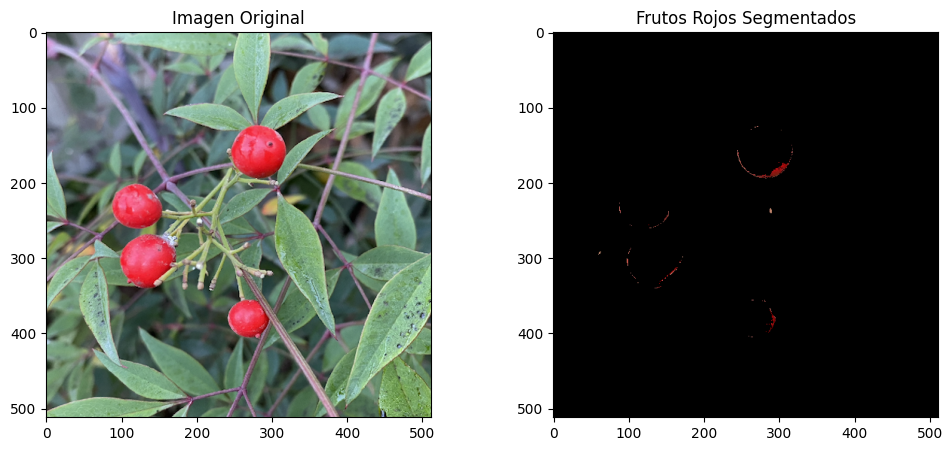

In [36]:
# Leer la imagen
img = cv2.imread('frutos_rojos.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convertir la imagen al espacio de color HSV
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# Definir el rango de color para los frutos rojos en HSV
rojo_bajo = np.array([0, 100, 100])
rojo_alto = np.array([10, 255, 255])

# Crear una máscara utilizando inRange
mascara = cv2.inRange(img_hsv, rojo_bajo, rojo_alto)

# Aplicar la máscara a la imagen original
frutos_rojos_segmentados = cv2.bitwise_and(img_rgb, img_rgb, mask=mascara)

# Mostrar la imagen original y la imagen segmentada
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].imshow(img_rgb)
axs[0].set_title('Imagen Original')

axs[1].imshow(frutos_rojos_segmentados)
axs[1].set_title('Frutos Rojos Segmentados')

plt.show()